# **0. Table of Content**

1. [마르코프 모델](#1.-마르코프_모델-(Markov-Model,-MM-이란)
2. [은닉 마르코프 모델](#2.-은닉-마르코프-모델-(Hidden-Markov-Model,-HMM))  
    2-1. [HMM의 구조](#2-1.-HMM의-구조)  
    2-2. [HMM의 동작](#2-2.-HMM의-동작)  
    (1) [우도 (Likehood)](#(1)-우도-(Likehood)  
    (2) [Forward Algorithm](#(2)-Forward-algorithm)
99. [참고 자료](#99.-참고자료)
***
# **1. 마르코프 모델<sup>[[1]](#footnote_1)</sup>이란**

- 마르코프 체인 (Markov Chain, MC)이라고도 하며 마르코프 성질(Markov Property)을 가진 이산확률과정(discrete-time stochastic process)를 의미한다.

    > 1. **이산 확률 과정 (discrete-time stochastic process)**  
         시간이 연속적으로 변하지 않고 이산적으로 변하며, 이에 따라 특정 상태가 발생할 확률이 변화하는 과정
    > 2. **마르코프 성질 (Markov Property)**   
         미래의 상태는 오직 현재의  상태 혹은 더 이전의 일정기간에만 영향을 받는다고 가정  
         즉, 미래의 어떤 상태를 예측하기 위해 과거의 긴 이력을 필요로 하지 않는 성질(memoryless)
        
- 마르코프 모델이 바로 이전상태만 고려하는 확률식은 아래와 같다.
> $P({o}_{t}|{o}_{1},...,{o}_{t-1}) = P({o}_{1}|{o}_{t -1})$  
- 바로 이전 상태(r = 1) 혹은 더 이전 상태(r = 2)까지 고려한다고 했을 때, r차 마르코프 모델은 아래처럼 표현할 수 있다.  
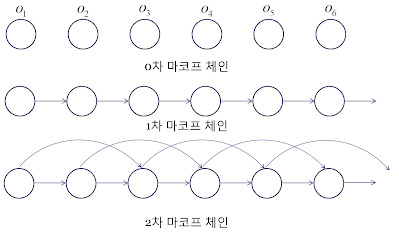
***

# **2. 은닉 마르코프 모델 <sup>[[2]](#footnote_2)</sup>이란**
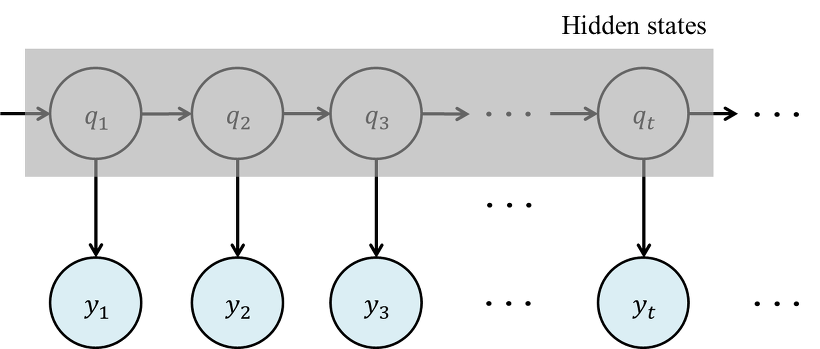
- 마르코프 모델에 은닉된 state와 직접적으로 확인 가능한 Observation을 추가하여 확장한 것이다.
- HMM을 이용하여 풀고자 하는 문제는 관축 가능한 y_t가 q_t에 종속적으로 발생한다고 할때,  
  y_t의 sequence를 이용하여 q_t의 sequence를 추론하는 것이다.

## **2-1. HMM의 구조**
- HMM은 **<Q, Y, $\pi$, A, B>** 라는 튜플로 정의되며, 각각의 요소가 의미하는 내용은 아래 표로 정리해두었다.

|인자 값|구성 성분|설명|
|:--|:--|:--|
|Q|{q1, q2, ..., q_N}|은닉된 state들의 집합|
|Y|{y1, y2, ..., y_M}|은닉된 state에서 발생할 수 있는 observation들의 집합|
|$\pi$|**R^N**|초기 state가 qi일 확률을 나타내는 initial probability p(q_i)의 집합|
|A|**R^(N x N)**|q_i에서 q_j로 이동할 확률을 나타내는 transition probability p(q_j\|q_i)의 집합|
|B|**R^(N x M)**|q_i에서 y_j가 발생할 확률을 나타내는 emission probability p(y_j\|q_i)의 집합|


🌱 **e.g.)**  
  주어진 정보가 어떤 사람의 식단이라고 가정하고, 알아내고자 하는 정보를 누구(친구, 가족, 회사 동료)와 먹었는가라고 해보자.   
  이 때 **Q = {친구, 가족, 회사 동료}** , **Y = {국밥, 고등어조림, 치킨, 피자, 파스타}** 로 정의하고,  
  initial probability **$\pi$** 와 **T**, **E**가 아래 두 표 처럼 추정되었다고 해보자.  
  
  1) Transition Probabilities (전이 확률 / A)
  
  ||친구|가족|회사 동료|
  |:--|:--|:--|:--|
  | **$\pi$** |0.3|0.4|0.3|
  |친구|0.4|0.4|0.2|
  |가족|0.2|0.45|0.35|
  |회사 동료|0.3|0.5|0.2|
  
  - 이 표를 통해 이 사람의 식사 패턴을 분석해 볼 수 있다.  
    예를 들면, 이전 식사를 가족과 함께하고, 이번 식사를 회사 동료와 함께할 확률은 35%이고,  
    이전 식사를 회사 동료와 함께하고, 이번 식사를 친구와 함께할 확률은 30%이다.
  
  2) Emission Probabilities (방출확률 / B)
  
  ||국밥|고등어 조림|치킨|피자|파스타|
  |:--|:--|:--|:--|:--|:--|
  |친구|0.05|0.025|0.625|0.2|0.1|
  |가족|0.1|0.4|0.3|0.1|0.1|
  |회사 동료|0.5|0.3|0.1|0.05|0.05|
  
  - 이 표를 통해서는 이 사람이 누구와 식사를 하느냐에 따라 메뉴를 선택하는 패턴을 분석해 볼 수 있다.  
    예를 들면, 친구와 만났을때는 고등어 조림을 2.5%의 확률로 먹으러 가고, 회사 동료와는 50% 확률로 국밥을 먹으러 간다.
    
  - 위 두개의 표를 기반으로 다이어그램을 그리면 다음과 같다.  
  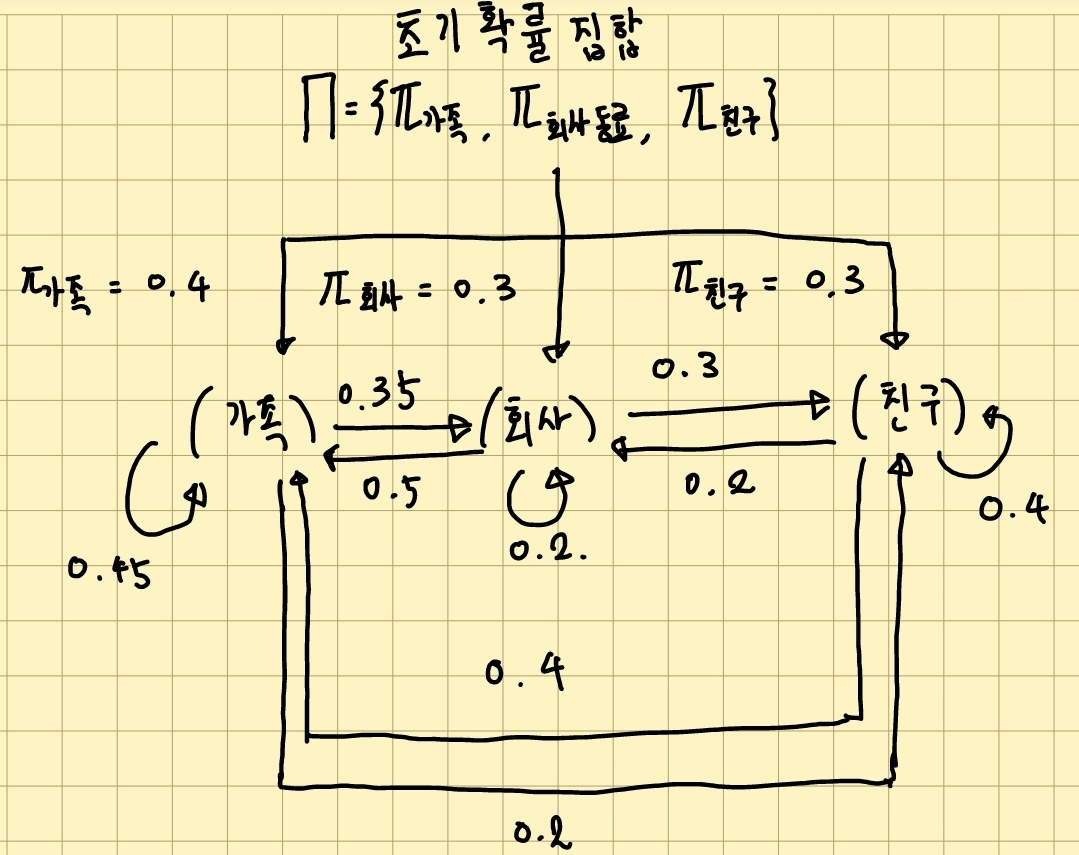
    
## **2-2. HMM의 동작**
- 위의 예시처럼 테이블이 주어졌을 때, HMM을 이용하여 두 가지 사항을 추론할 수 있다.  
   > 1. 국밥 → 고등어 조림 → 치킨 순으로 하루 세끼를 먹었을 확률 계산
   > 2. 국밥 → 고등어 조림 → 치킨 순으로 하루 세끼를 먹었을 때, 각 끼니마다 누구와 식사했을지에 대한 추론 
- 위의 두가지 추론은 HMM을 이용하여 조건부 확률(Conditional Probability)를 계산하는 것과 같다.
- HMM을 구현할 때는 세 가지를 문제를 풀기 위한 연산을 고려해야 한다.
   > 1. HMM의 파리미터가 주어졌을 때, 주어진 Observation이 나타날 확률 계산
   > 2. HMM의 파라미터가 주어졌을 때, 주어진 Observation이 나타날 확률이 가장 높은 state의 나열을 계산
   > 3. 학습 데이터로부터 HMM의 파라미터 $\theta\;=\;\{\pi, A, B\}$학습  
   >  
   > ⚠️ 1, 2번 문제는 각각 Dynamic Programming 기반의 forward algorithm과 Viterbi algorithm으로 해결할 수 있다.  
   > ⚠️ 3번 문제는 HMM의 파라미터를 학습시키는 문제는 주로 EM algorithm<sup>[[3]](#footnote_3)</sup>의   
     &nbsp;&nbsp;&nbsp;&nbsp;한 형태인 Baum-Welch Algorithm으로 해결한다.
  

### **(1) 우도 (Likehood)**
- 모델 $\theta$가 주어졌을때 관측치 **O**가 나타날 확률 $p(O|\theta)$를 나타낸다.  
  → 즉, 모델 $\theta$가 임의의 관측치 하나를 뽑았을 경우, 그 관측치가 **O**일 확률이다.
- 가령, 하루 세끼를 식사한 메뉴가 국밥 - 피자 - 고등어 조림 순으로 이루어질 확률을 계산하기 위해선  
  각 끼니 별 식사 인원의 배열에 따른 확률을 모두 계산해야 하는데, 이는 3<sup>3</sup>=27번의 계산과정을 거쳐야한다.
  
  |상태 1|상태 2|상태 3|
  |:--|:--|:--|
  |가족|가족|가족|
  |가족|가족|회사|
  |가족|가족|친구|
  ||27가지 경우의 수를 모두 적을 수 있으나 여백이 부족하여 적지 않는다...|
  |친구|친구|가족|
  |친구|친구|회사|
  |친구|친구|친구|

> $
        P(국밥\;고등어\;조림\;치킨)\;=\\
        P(국밥\;고등어\;조림\;치킨,\;가족\;가족\;가족)\;+\\
        P(국밥\;고등어\;조림\;치킨,\;가족\;가족\;회사\;동료)\;+ ... +\\
        P(국밥\;고등어\;조림\;치킨,\;친구\;친구\;회사\;동료)\;+\\
        P(국밥\;고등어\;조림\;치킨,\;친구\;친구\;친구)\;
  $

- 이 중 한가지 예로 끼니별 식사 인원 배열이 [가족, 회사 동료, 친구]인 경우의 확률을  
  위의 전이확률 표와 방출확률 표를 이용해 구해보자면,  
> $
 P(국밥\;고등어\;조림\;치킨,\;회사\;동료\;가족\;가족)\\
 =\; P(국밥|init)*P(고등어\;조림|국밥)*P(치킨|고등어\;조림)*P(국밥|회사\;동료)*P(고등어\;조림|가족)*P(치킨|가족)\\
 =\; 0.3*0.5*0.45*0.5*0.4*0.3\;=\;0.0405\;=\;4.05\% \;이다.
$

### **(2) Forward algorithm<sup>[[4]](#footnote_4)</sup>**
- HMM의 모든 파라미터가 결정되었을 때, 주어진 observation O = o<sub>1</sub>,o<sub>2</sub>, ..., o<sub>T</sub>가 관측될 확률 P(O\|$\theta$)를 계산하는 것이다.  

  > $(i)\;p({o}_{1}|\theta)\;=\;\sum_{{i}_{1}}p(q_{{i}_{1}})p(o_1|q_{i_1})$
  > $(ii)\;p(o_1, o_2|\theta)\;=\;\sum_{i_1}p(q_{{i}_{1}})p(o_1|q_{i_1})\sum_{i_2}p(q_{i_2}|q_{{i}_{1}})p(o_2|q_{i_2})\;\\\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\sum_{i_1}\sum_{i_2}p(q_{{i}_{1}})p(o_1|q_{i_1})p(q_{i_2}|q_{{i}_{1}})p(o_2|q_{i_2})$ 
    > $ (iii)\;p(O|\theta)\;=\;\sum_{i_1}\sum_{i_2}...\sum_{i_T}p(q_{{i}_{1}})p(o_1|q_{i_1})p(q_{i_2}|q_{{i}_{1}})p(o_2|q_{i_2})...p(q_{{i}_{T}}|q_{i_{T-1}})p(o_T|q_{i_{T}})$
  
  (i) o1이 나타날 확률.  
  (ii) o1과 o2가 연속해서 일어날 확률.  
  (iii) 시간 T까지의 Observation O가 나타날 확률.  

  
  ⚠️ 마지막 (iii)을 계산하는 것은 시간 복잡도 측면에서 O(2TN<sup>T</sup>)이라는 막대한 자원을 요구하여 HMM은 O(TN<sup>2</sup>)의 시간 복잡도를 갖는  
  &nbsp;&nbsp;&nbsp;&nbsp;다이나믹 프로그래밍<sup>[[5]](#footnote_5)</sup>기반의 forward algorithm을 이용한다.

- Forward Algorithm의 핵심 아이디어는 중복되는 계산 결과를 따로 저장해두었다 필요할때마다  
  불러와 사용하는 방식을 이용한다.
- 이때 저장된 계산값을 전방 확률<sup>[[6]](#footnote_6)</sup>이라 하고, 전방 확률은 다음과 같이 계산되는데,  
  $\alpha_t(j)$은 j번째 상태와 t개의 관측치 시퀀스가 나타날 수 있는 경우의 수가 모두 고려되어 합쳐진 확률이다.
  
  > $\alpha_{t}(j)\;=\;\sum_{i\;=\;1}^{n}\alpha_{t-1}(i)\;\times\;a_{ij}\;\times\;b_i(o_t)$
- 예를 들어 아침 식사로 국밥, 점심 식사로 고등어 조림을 먹었다고 관측되었을 때,  
  아침 식사는 가족, 점심 식사는 회사 동료과 함께했을 확률은 다음과 같다.  
  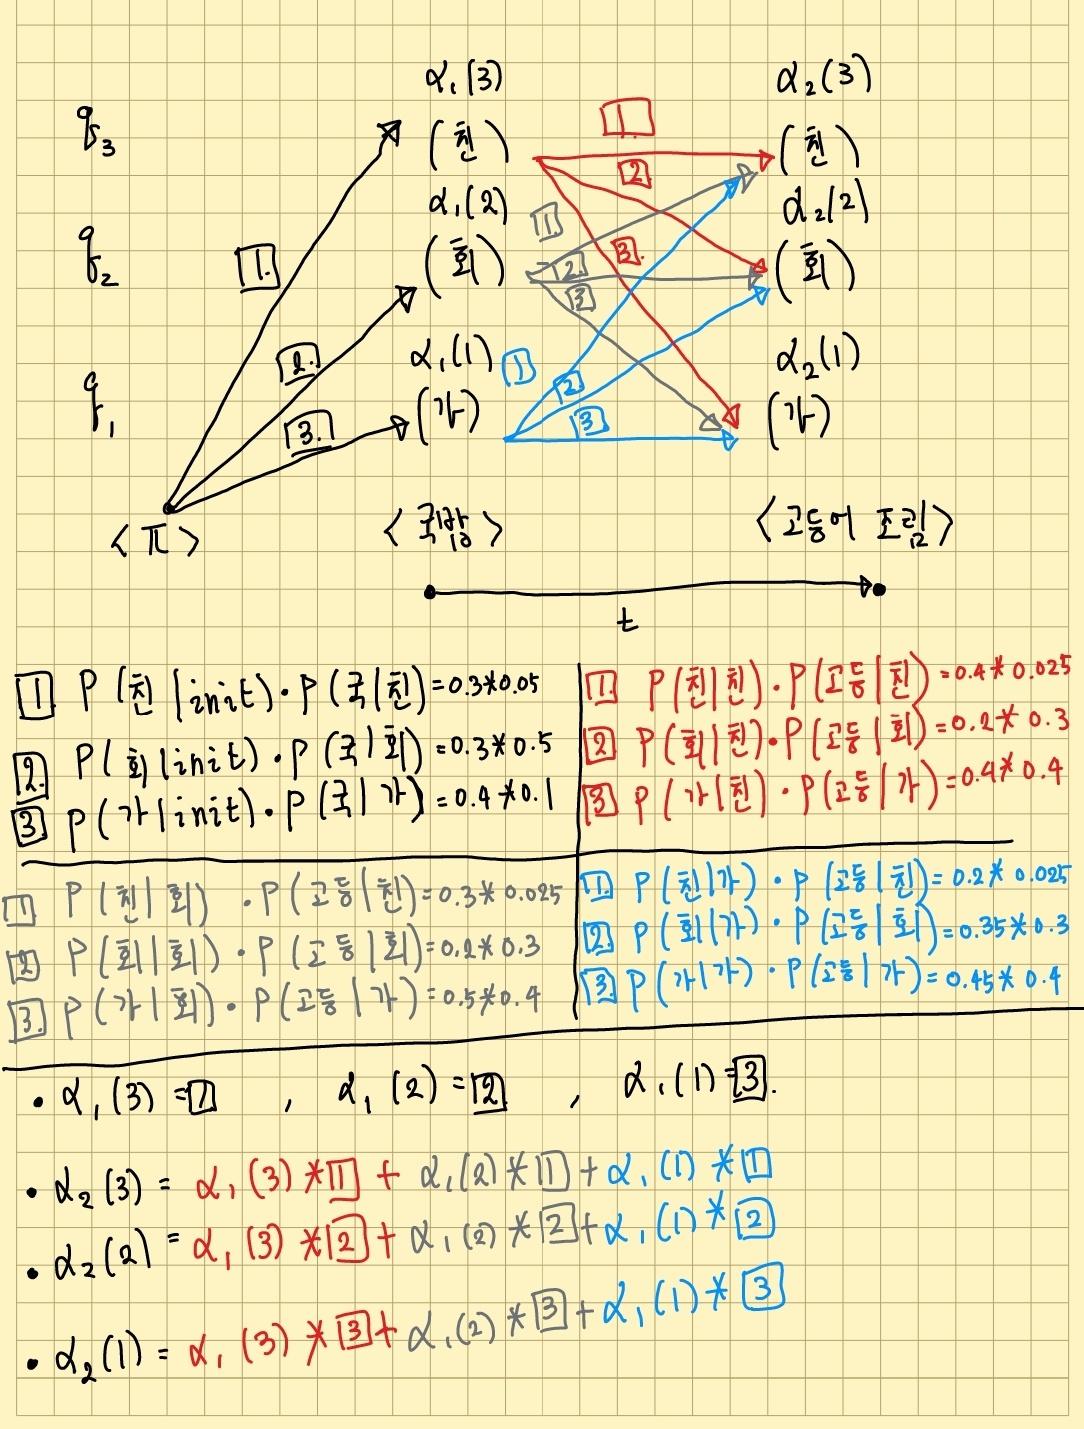
  
> $
    1)\; \alpha_1(3)\;=\;P(친구|\pi)*P(국밥|친구)\;=\;0.3*0.05 \\
    2)\; \alpha_1(2)\;=\;P(회사\;동료|\pi)*P(국밥|회사\;동료)\;=\;0.3*0.5\\
    3)\; \alpha_1(1)\;=\;P(가족|\pi)*P(국밥|가족)\;=\;0.4*0.1\\
    \\4)\; \alpha_2(2)\;=\;\alpha_1(3)*P(회사\;동료|친구)*P(고등어\;조림|회사\;동료)\;+ \\
       \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\alpha_1(2)*P(회사\;동료|회사\;동료)*P(고등어\;조림|회사\;동료)\;+ \\
                        \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\alpha_1(1)*P(회사\;동료|가족)*P(고등어\;조림|회사\;동료)\\ \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\;(0.3*0.5*0.2*0.3)+(0.3*0.5*0.2*0.3)+(0.4*0.1*0.35*0.3)\;\\ \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\;0.0222\;=\;2.22\%\;이다.
$
- ~~확통은 배우면 재밌긴한데.. 계산해야하는 수들이 소수점이라 계산결과가 더럽다..~~
- 전방확률을 관측치 시퀀스 끝까지 계산하면 우도와 동치가 된다.
> $
    P(O|\theta)\;=\;P(o_1,o_2,\;...\;,o_{T-1},o_T|\theta)\\
    \;\;\;\;\;\;\;\;\;\;\;=\;P(o_1,o_2,\;...\;,o_{T-1},o_T,q_t\;=\;q_F|\theta)\\
    \;\;\;\;\;\;\;\;\;\;\;=\;\alpha_T(q_F)
  $   
  
### **(3) Viterbi Algorithm<sup>[[7]](#footnote_7)</sup>**
- 모델 $\theta$와 관측치 시퀀스 **O**가 주어졌을 때 가장 확률이 높은 은닉상태의 시퀀스 Q를 찾는 과정을 디코딩(Decoding)이라 한다.  
- HMM에서의 디코딩 과정에서는 **비터비 알고리즘(Viterbi Algorithm)** 이 주로 사용된다.  
- 비터비 알고리즘에서의 **비터비 확률(Viterbi Probability)** v는 아래와 같이 정의되는데,  
  $v_t(j)$는 t번째 시점의 j번째 은닉상태를 의미한다.  
  > $v_t(j)\;=\;max^{n}_i[v_{t-1}(i)\;\times\;a_{ij}\;\times\;b_j(o_t)]$
  - forward probability를 구하는 방법과 유사한데, **forward algorithm에서는 모든 경우의 수를 고려해 모두 더해주었다면**,  
       **viterbi algorithm은 그 확률들의 최댓값을 구한다.**  

- 위의 예시로 비터비 확률을 구하는 것은 다음과 같다.  
> $
    1)\;v_1(3)\;=\;max[P(친구|\pi)*P(국밥|친구)]\;=\;P(친구|\pi)*P(국밥|친구)  \\
    2)\;v_1(2)\;=\;max[P(회사\;동료|\pi)*P(국밥|회사\;동료)]\;=\;P(회사\;동료|\pi)*P(국밥|회사\;동료)  \\
    3)\;v_1(1)\;=\;max[P(가족|\pi)*P(국밥|가족)]\;=\;P(가족|\pi)*P(국밥|가족)  \\
    4)\;v_2(2)\;=\;max[v_1(3)*P(회사\;동료|친구)*P(고등어\;조림|회사\;동료), \\
    \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;v_1(2)*P(회사\;동료|회사\;동료)*P(고등어\;조림|회사\;동료), \\
    \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;v_1(3)*P(회사\;동료|가족)*P(고등어\;조림|회사\;동료)]
$

In [1]:
state       = ('친구', '가족', '회사 동료')
observation = ('고등어 조림', '국밥', '피자')

start_p = {'친구' : 0.3, '가족' : 0.4, '회사 동료' : 0.3}
trans_p = {
            '친구'     : {'친구' : 0.4,'가족' : 0.4, '회사 동료' : 0.2},
            '가족'     : {'친구' : 0.2,'가족' : 0.45, '회사 동료' : 0.35},
            '회사 동료' : {'친구' : 0.3,'가족' : 0.5, '회사 동료' : 0.2},
        }

emit_p = {
            '친구'     : {'국밥' : 0.05, '고등어 조림' : 0.025, '치킨' : 0.625, '피자' : 0.2, '파스타' : 0.1},
            '가족'     : {'국밥' : 0.1, '고등어 조림' : 0.4, '치킨' : 0.3, '피자' : 0.1, '파스타' : 0.1},
            '회사 동료' : {'국밥' : 0.5, '고등어 조림' : 0.3, '치킨' : 0.1, '피자' : 0.05, '파스타' : 0.05},
        }

In [8]:
def viterbi(obs, states, init_p, trans_p, emit_p):
    
    V = [{}]
    for state in states: 
        V[0][state] = {'prob': init_p[state] * emit_p[state][obs[0]], 'prev' : None}
        
    for t in range(1, len(obs)):
        V.append({})
        
        for state in states:
            max_tr_prob = max(V[t - 1][prev_st]['prob'] * trans_p[prev_st][state] for prev_st in states)

            for prev_st in states:
                if V[t - 1][prev_st]['prob'] * trans_p[prev_st][state] == max_tr_prob:
                    max_prob = max_tr_prob * emit_p[state][obs[t]]
                    V[t][state] = {'prob' : max_prob, 'prev' : prev_st}
                    break
                    
    for line in dptable(V):
        print(line)
        
        opt      = []
        max_prob = max(value['prob'] for value in V[-1].values())
        previous = None
        
        for state, data in V[-1].items():
            if data['prob'] == max_prob:
                opt.append(state)
                previous = state
                break
                
    for t in range(len(V) - 2, -1, -1):
        opt.insert(0, V[t + 1][previous]['prev'])
        previous = V[t + 1][previous]['prev']
        
    print(f'steps of state are {opt} with highest probability')
    

def dptable(V):
    yield " ".join(("%12d" % i) for i in range(len(V)))
    for state in V[0]: 
        yield "%.7s : "%state + " ".join("%.7s" % ("%f" %v[state]['prob']) for v in V)

In [9]:
viterbi(observation, state, start_p, trans_p, emit_p)

           0            1            2
친구 : 0.00750 0.00160 0.00168
가족 : 0.16000 0.00720 0.00140
회사 동료 : 0.09000 0.02800 0.00028
steps of state are ['가족', '회사 동료', '친구'] with highest probability


# **99. 참고자료**
## **99-1. 도서**
## **99-2. 논문, 학술지**
## **99-3. 웹 사이트**
- yg's blog : [ML] 은닉 마르코프 모델 (Hidden Markov Model, HMM) | [[블로그 링크]](https://yganalyst.github.io/ml/hmm/)
- ratsgo's blog : 은닉마르코프모델 (Hidden Markov Models) | [[블로그 링크]](https://ratsgo.github.io/machine%20learning/2017/03/18/HMMs/)
- Untitled : [머신 러닝] - 은닉 마르코프 모델 (Hidden Markov Model, HMM) | [[블로그 링크]](https://untitledtblog.tistory.com/97)

## **99-4. 데이터셋 출처**

## **99-5. 더 알아보기**
<a name="footnote_1">[1]</a> Markov Model  
<a name="footnote_2">[2]</a> Hidden Markov Model  
<a name="footnote_3">[3]</a> Expectation-Maximization algorithm | [[참조 링크]](https://ko.wikipedia.org/wiki/%EA%B8%B0%EB%8C%93%EA%B0%92_%EC%B5%9C%EB%8C%80%ED%99%94_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)  
<a name="footnote_4">[4]</a> forward algorithm | [[참조 링크]](https://en.wikipedia.org/wiki/Forward_algorithm)  
<a name="footnote_5">[5]</a> dynamic programming | [[참조 링크]](https://namu.wiki/w/%EB%8F%99%EC%A0%81%20%EA%B3%84%ED%9A%8D%EB%B2%95)  
<a name="footnote_6">[6]</a> forward probability  
<a name="footnote_7">[7]</a> Viterby Algorithm | [[참조 링크]](https://ko.wikipedia.org/wiki/%EB%B9%84%ED%84%B0%EB%B9%84_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)